In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
summary = pd.read_csv('data/atussum_2014.dat')

In [3]:
summary.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
hockey = summary[summary.t130216 > 0]
data = hockey.corr()
data.t110101.order(ascending=False).head()

t110101    1.000000
t180301    0.637814
t070103    0.630845
t180703    0.630845
t181204    0.630845
Name: t110101, dtype: float64

In [5]:
print(hockey.TELFS)
print(hockey.TEAGE)
print(hockey.TRSPPRES)
print(hockey.TESEX)
print(hockey.TRYHHCHILD)

698      5
1072     1
4631     5
4638     1
8152     1
9691     5
10712    1
11001    1
11522    1
Name: TELFS, dtype: int64
698      69
1072     35
4631     43
4638     36
8152     46
9691     18
10712    38
11001    36
11522    28
Name: TEAGE, dtype: int64
698      3
1072     1
4631     1
4638     2
8152     1
9691     3
10712    1
11001    1
11522    1
Name: TRSPPRES, dtype: int64
698      2
1072     2
4631     2
4638     2
8152     2
9691     2
10712    1
11001    2
11522    2
Name: TESEX, dtype: int64
698      -1
1072      8
4631      8
4638     -1
8152     10
9691     10
10712     8
11001    11
11522    -1
Name: TRYHHCHILD, dtype: int64


# Hockey 

* The first bit of data examined was respondents who had reported watching any amount of hockey on their day.  Unfortunately there were only 9 such people in the entire database so the data isn't very relevant but there were some interesting trends.
    1. 8 out of 9 repondents who watched a hockey game were female, despite the viewership of the sport being percieved largely as male.
    1. There were hockey fans in just about every age bracket, but a full third had a younger child (aged 8-11) in the household.
    1. Besides travel the most corralated point of data with watching hockey was purchasing food (not groceries) which makes some sense as either arena food or watching in a bar.

In [44]:
over_20 = summary[summary.TEAGE > 20]
twenties = over_20[over_20.TEAGE < 30]
twenty_m = twenties[twenties.TESEX == 1]
twm = twenty_m.corr()
twm = twm[twm < 1]

In [45]:
print(len(twm))
twm.head()

409


,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
tucaseid,NaN,-0.015930,0.086490,-0.035220,NaN,0.081040,0.015251,0.009159,0.042464,0.012483,...,-0.008988,NaN,NaN,NaN,-0.001611,-0.054897,-0.028893,0.008962,-0.118765,-0.071316
TUFINLWGT,-0.01593,NaN,-0.071016,-0.227233,NaN,-0.109849,-0.029582,0.031392,-0.066650,0.050454,...,0.045455,NaN,NaN,NaN,-0.051565,0.015956,-0.009278,0.036230,-0.051430,-0.018496
TRYHHCHILD,0.08649,-0.071016,NaN,-0.162733,NaN,-0.169799,0.044668,-0.070935,0.068022,0.094115,...,-0.031629,NaN,NaN,NaN,-0.049570,0.032878,-0.032125,-0.018713,-0.061402,-0.022325
TEAGE,-0.03522,-0.227233,-0.162733,NaN,NaN,0.212374,-0.055043,0.138731,0.046773,-0.115876,...,0.021423,NaN,NaN,NaN,-0.059306,0.009098,-0.015770,-0.057432,0.067564,-0.011856
TESEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
corr_list = []
for thing in twm:
    corr_list.append((twm[thing].max(), thing))

In [47]:
corr_list

[(0.14691964609915156, 'tucaseid'),
 (0.19489395218118585, 'TUFINLWGT'),
 (0.47122572538561186, 'TRYHHCHILD'),
 (0.27807501456483341, 'TEAGE'),
 (nan, 'TESEX'),
 (0.34158929793014631, 'PEEDUCA'),
 (0.2366688918005195, 'PTDTRACE'),
 (0.23117394243660372, 'PEHSPNON'),
 (0.21527998945286347, 'GTMETSTA'),
 (0.2850486967557273, 'TELFS'),
 (0.90143121040042462, 'TEMJOT'),
 (0.90143121040042462, 'TRDPFTPT'),
 (0.26111392946280076, 'TESCHENR'),
 (0.43295307026439261, 'TESCHLVL'),
 (0.18026868078346112, 'TRSPPRES'),
 (0.54829041247097188, 'TESPEMPNOT'),
 (0.51916004622805834, 'TRERNWA'),
 (0.51692483566396241, 'TRCHILDNUM'),
 (0.54829041247097188, 'TRSPFTPT'),
 (0.68493545171119119, 'TEHRUSLT'),
 (0.14661994086183328, 'TUDIARYDAY'),
 (0.38058062219104272, 'TRHOLIDAY'),
 (0.88856597424635053, 'TRTEC'),
 (0.51692483566396241, 'TRTHH'),
 (0.15384029646038774, 't010101'),
 (0.45144493117483575, 't010102'),
 (0.18710773627227797, 't010201'),
 (0.11533364837652321, 't010299'),
 (0.36911867780105512, 

In [62]:
twm.t130126.order(ascending=False)[:5]

t040101    0.439426
t181202    0.354301
t180405    0.292854
t181301    0.261002
t050401    0.236908
Name: t130126, dtype: float64

# Young Men

* Having found my hockey group a little lacking in numbers I next looked at males between the ages of 21 and 29.  An explanation of my methods.
    1. I first trimmed down my dataset by cutting out everyone buut who I wanted, this left me with a group of ~500 men to try and find corralations with.
    1. I spent some time just looking at corralations on an item by item basis, but upon finding a large number of low corralations I wrote a small function to make a list of each item and the top corralation score associated with it.  I then scanned the list and picked out interesting items.
    1. What my list didn't say was the thing my item was corralated with, so I would call the corrlation column of that item and order it so that the largest item was on top.
        * In my example above you can see the full list of corralations of young men. Browsing through I select t130126, which corresponds to playing soccer, and look for what it corralates at roughly a 44% rate to.  The answer is physical care for non-hh children.  The story this tells is likely that many adult men in their twenties who play soccer also coach or at least help out with younger kids.  

In [63]:
large_corr = summary.corr()

In [64]:
large_corr = large_corr[large_corr < 1]

In [65]:
max_list = []
min_list = []
for thing in large_corr:
    max_list.append((large_corr[thing].max(), thing))
for thing in large_corr:
    min_list.append((large_corr[thing].min(),thing))

In [66]:
min_list

[(-0.040702110950891282, 'tucaseid'),
 (-0.21317407125315793, 'TUFINLWGT'),
 (-0.36589720303454754, 'TRYHHCHILD'),
 (-0.7930274742951624, 'TEAGE'),
 (-0.1870786246601, 'TESEX'),
 (-0.25084881947559384, 'PEEDUCA'),
 (-0.077560532934139739, 'PTDTRACE'),
 (-0.095728596020625223, 'PEHSPNON'),
 (-0.097185208631698911, 'GTMETSTA'),
 (-0.97744145655114512, 'TELFS'),
 (-0.97744145655114512, 'TEMJOT'),
 (-0.94982770124444804, 'TRDPFTPT'),
 (-0.7930274742951624, 'TESCHENR'),
 (-0.39885661504031833, 'TESCHLVL'),
 (-0.944597380593035, 'TRSPPRES'),
 (-0.944597380593035, 'TESPEMPNOT'),
 (-0.59448447711128527, 'TRERNWA'),
 (-0.46501979133778898, 'TRCHILDNUM'),
 (-0.64854768588741118, 'TRSPFTPT'),
 (-0.82810528932767369, 'TEHRUSLT'),
 (-0.21048286696143564, 'TUDIARYDAY'),
 (-0.042702145380036791, 'TRHOLIDAY'),
 (-0.065468771013847182, 'TRTEC'),
 (-0.3140098039662706, 'TRTHH'),
 (-0.3324652114133419, 't010101'),
 (-0.13067100248771912, 't010102'),
 (-0.19506626986846315, 't010201'),
 (-0.01853849889453

In [70]:
large_corr.t010101.order(ascending=True)[:5]

t050101    -0.332465
t180501    -0.216202
TEHRUSLT   -0.157873
PEEDUCA    -0.146713
TRERNWA    -0.134315
Name: t010101, dtype: float64

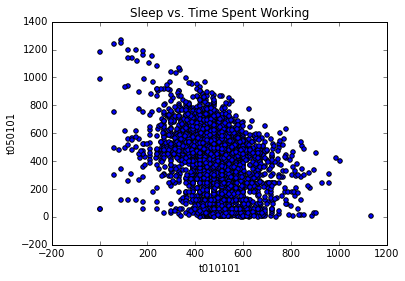

In [95]:
jobs = summary[summary.t050101 > 0]
jobs.plot(kind='scatter', x='t010101', y='t050101', title='Sleep vs. Time Spent Working')

# Negative corralation

* Having looked at two much smaller groups and since I had a tool to find top corralations in a dataset I decided to take a tilt at the full dataset.
* One thing I had missed on my first pass with my formula, however, was it was only looking at the largest corralations, and since negative corralation is just as important I added a second list to examine those.  Above I've included a rather poignant one.
    1. I pulled out the minimum corralations for the data set and found that t010101, or time spent sleeping, had and found a decent negative corralation (33%).
    1. I looked up what that item was and found t050101, time spent working.  People who work longer hours tend to sleep less, which is very interesting to me.  Some thoughts at to why this might be.
        1. People want or expect a set amount of non-work time in their day and will sacrifice sleep to get it.
        1. People work so much they don't actually have enough time to get a full nights sleep.
    1. if you look at the graph above you can see that the vast majority of t010101, or time spent sleeping, falls in a clump in the middle of the x-axis, but there is a definate downward slope to the data with people who get very little sleep having worked a lot and people who are well rested working less, but as there are people with little sleep who barely worked it's clearly not the only indicator.
    1. Interestingly looking at the rest of the data, time spent working was just about the only category that showed even moderate negative corralations in the whole data set, both with time spent sleeping, but also amount of tv watched.
        

In [83]:
large_corr.t130126.order(ascending=False)[:5]

t181301     0.096832
t060101     0.076922
TESCHLVL    0.050441
t180601     0.045005
t120306     0.044558
Name: t130126, dtype: float64

# Importance of Subsets

* The final thing I wanted to look at is the soccer data that I had examined in the young men subset.  As a reminder t130126 examines the relation of other activities to playing soccer.
* My findings were much different, accurately illustrating the positive effect good sampling can have on finding corralation.
* The largest corralation here was travelling to sporting events, and even that was not terribly strong, and the formerly strong playing with children corralation has disappeared completely.